Source: 
https://irweb.irepertoire.com/nir/

Username: demo

Password: 12345

### Calculate Diversity Index and entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/yhc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/21013_0_CDR3Length.csv",sep='\t',index_col=0,names="X")
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/25671_CDRs.csv",usecols=["Freq"])
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/21551_CDR3_list_1.csv",header=None)
data=pd.read_csv("~/Downloads/Demo_Data-Demo/21747_CDR3_list_1.csv",header=None)
data.columns=["CDR3",'Freq']
data

,CDR3,Freq
0,AKTTYYYDSSGYQTPYYFDY,7537
1,ARSAAVVATAFTWRSYKGMDV,1804
2,ARHGQQLALA,1722
3,ARILKDSSGWYHFDY,1297
4,ARGAYSSNYARIDD,1250
5,ATDQPGFGFEV,1203
6,AKAQNVQYHAFDI,1098
7,VRVVPNNYGYGY,978
8,ARGRGYRESYYAFDI,911
9,ARRVLPQKNHFDS,859


In [3]:
n=len(data) # data.shape[0]
if n>10000:
    data=data.loc[0:10000-1]
    n=len(data)
    
r=data.Freq

In [4]:
def cumuSeq(r):
    "This function takes a sorted sequence and returns its cumulated sequence with the first element = 0"
    y = np.zeros(n+1,dtype=np.int32)
    y[1]=r[0]
    for i in range(2,n+1):
        y[i]=y[i-1]+r[i-1]
    
    return y

In [5]:
def CDR3(r):
    "This function takes a sorted sequence, calculate its diversity index and entropy, then make plots"
    totalReads=sum(r)
    p=r/totalReads
    entropy=-sum(p*np.log2(p))
    print('entropy = {:.2f}'.format(entropy))
    
    totalReads50=round(totalReads/2)
    
    y=cumuSeq(r)

    for i in range(2,n+1):
        if y[i-1]<totalReads50 and y[i]>totalReads50:
            print("found 50% at unique CDR3 index = ",i)
            DI=i*100/n
            print("DI={:.1f}".format(DI) )
                
    k=np.arange(n+1)
    #print("k=",k)
    
    x=k/n
    #print("x=",x)
    
    y0 = np.zeros(n+1)
    y0=k*(totalReads/n)
    #print("y0=",y0)
    
    plt.figure(figsize=(6,6))
    plt.plot(x*100,y/max(y)*100,'b.-')
    plt.plot(x*100,y0/max(y0)*100,'g.--')
    plt.grid(True)
    plt.rc('grid', linestyle="--", color='black')
    plt.xlabel("Percentage of total reads (%)")
    plt.ylabel("Percentage of unique CDR3s (%)")
    plt.title('D.I.={:.1f}'.format(DI))
            
    return DI, entropy

### Diversity Index:
Find where 50% of total reads falls into the cumulative series

entropy = 12.95
found 50% at unique CDR3 index =  2818
DI=28.2


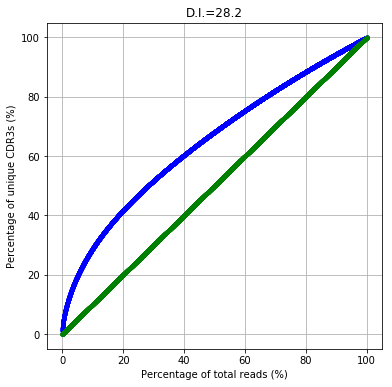

In [6]:
DI, entropy= CDR3(r)